## Machine Learning Waste Detection: Data Augmentation

In this notebook, we use the Albumentations library to augment the dataset we have annotated, so that we have more examples for training.

#### Import relevant libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import albumentations as A
from matplotlib import image
from bs4 import BeautifulSoup
from matplotlib import image

#### Load the dataset 

Firstly, attempt to apply data augmentation techniques to a single image.

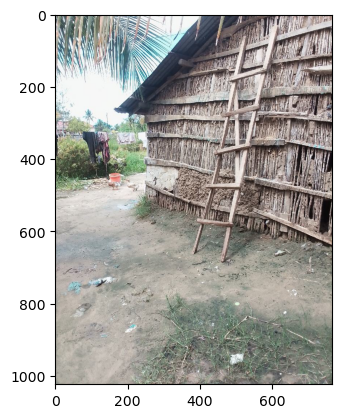

In [2]:
img = image.imread('/Users/gautamchauhan/Desktop/MAPS Summer Internship/Annotated Images/1742978446009.jpg')
plt.imshow(img)

In [3]:
with open('/Users/gautamchauhan/Desktop/MAPS Summer Internship/Annotated Images/1742978446009.xml','r') as f:
    annotations = f.read()

In [4]:
annotations

'<annotation>\n\t<folder>Annotated Images</folder>\n\t<filename>1742978446009.jpg</filename>\n\t<path>/Users/gautamchauhan/Desktop/MAPS Summer Internship/Annotated Images/1742978446009.jpg</path>\n\t<source>\n\t\t<database>Unknown</database>\n\t</source>\n\t<size>\n\t\t<width>768</width>\n\t\t<height>1024</height>\n\t\t<depth>3</depth>\n\t</size>\n\t<segmented>0</segmented>\n\t<object>\n\t\t<name>Trash</name>\n\t\t<pose>Unspecified</pose>\n\t\t<truncated>0</truncated>\n\t\t<difficult>0</difficult>\n\t\t<bndbox>\n\t\t\t<xmin>30</xmin>\n\t\t\t<ymin>739</ymin>\n\t\t\t<xmax>78</xmax>\n\t\t\t<ymax>776</ymax>\n\t\t</bndbox>\n\t</object>\n\t<object>\n\t\t<name>Trash</name>\n\t\t<pose>Unspecified</pose>\n\t\t<truncated>0</truncated>\n\t\t<difficult>0</difficult>\n\t\t<bndbox>\n\t\t\t<xmin>97</xmin>\n\t\t\t<ymin>725</ymin>\n\t\t\t<xmax>175</xmax>\n\t\t\t<ymax>758</ymax>\n\t\t</bndbox>\n\t</object>\n\t<object>\n\t\t<name>Trash</name>\n\t\t<pose>Unspecified</pose>\n\t\t<truncated>0</truncated>\n\

In [5]:
annotation_soup = BeautifulSoup(annotations,"xml")

In [6]:
annotation_soup

<?xml version="1.0" encoding="utf-8"?>
<annotation>
<folder>Annotated Images</folder>
<filename>1742978446009.jpg</filename>
<path>/Users/gautamchauhan/Desktop/MAPS Summer Internship/Annotated Images/1742978446009.jpg</path>
<source>
<database>Unknown</database>
</source>
<size>
<width>768</width>
<height>1024</height>
<depth>3</depth>
</size>
<segmented>0</segmented>
<object>
<name>Trash</name>
<pose>Unspecified</pose>
<truncated>0</truncated>
<difficult>0</difficult>
<bndbox>
<xmin>30</xmin>
<ymin>739</ymin>
<xmax>78</xmax>
<ymax>776</ymax>
</bndbox>
</object>
<object>
<name>Trash</name>
<pose>Unspecified</pose>
<truncated>0</truncated>
<difficult>0</difficult>
<bndbox>
<xmin>97</xmin>
<ymin>725</ymin>
<xmax>175</xmax>
<ymax>758</ymax>
</bndbox>
</object>
<object>
<name>Trash</name>
<pose>Unspecified</pose>
<truncated>0</truncated>
<difficult>0</difficult>
<bndbox>
<xmin>191</xmin>
<ymin>858</ymin>
<xmax>227</xmax>
<ymax>889</ymax>
</bndbox>
</object>
<object>
<name>Trash</name>
<pos

In [25]:
# Find the bounding boxes within the document
boxes = annotation_soup.find_all("bndbox")

# We want the box coordinates in the format np.array([x1min,y1min,x1max,y1max],[x2min,y2min,x2max,y2max],...)
xmin = [int(val.text) for val in annotation_soup.find_all("xmin")]
ymin = [int(val.text) for val in annotation_soup.find_all("ymin")]
xmax = [int(val.text) for val in annotation_soup.find_all("xmax")]
ymax = [int(val.text) for val in annotation_soup.find_all("ymax")]

flipped_array = np.array([xmin,ymin,xmax,ymax])
bboxes = np.transpose(flipped_array)
bboxes

array([[ 30, 739,  78, 776],
       [ 97, 725, 175, 758],
       [191, 858, 227, 889],
       [124, 880, 143, 897],
       [478, 929, 527, 973]])

In [41]:
# Set class labels
class_labels = np.array([val.text for val in annotation_soup.find_all("name")])
class_labels

array(['Trash', 'Trash', 'Trash', 'Trash', 'Trash'], dtype='<U5')

In [101]:
# Configure the transformation pipeline
transform = A.Compose([A.LongestMaxSize(max_size=1024,p=1.0),
                      A.PadIfNeeded(min_height=1024,min_width=1024,border_mode=cv2.BORDER_CONSTANT,p=1.0),
                      A.HorizontalFlip(p=1.0),
                      A.Affine(rotate=-10,
                               scale=1.3,p=1.0)],
                      bbox_params=A.BboxParams(format="pascal_voc",label_fields=["class_labels"]))

In [102]:
augmented_data = transform(image=img,bboxes=bboxes,class_labels=class_labels)

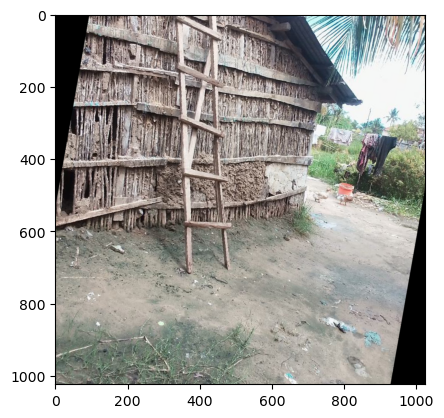

In [103]:
augmented_image = augmented_data["image"]
plt.imshow(augmented_image)

In [104]:
augmented_labels = augmented_data["class_labels"]
augmented_bboxes = augmented_data["bboxes"]

Text(0.5, 1.0, 'Original Image')

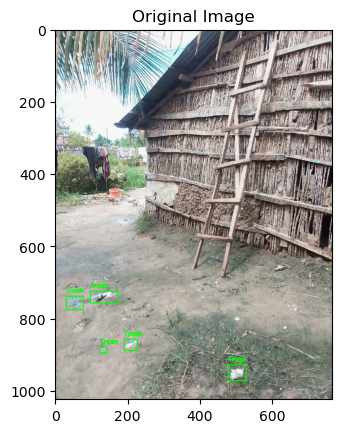

In [105]:
# N.B. for loop below copied from Gemini because I was getting frustrated

display_image = img.copy()

for bbox, label in zip(bboxes, class_labels):
    x_min, y_min, x_max, y_max = [int(val) for val in bbox]
    cv2.rectangle(display_image, (x_min, y_min), (x_max, y_max), color=(0, 255, 0), thickness=2)
    cv2.putText(display_image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

plt.imshow(display_image)
plt.title("Original Image")

Text(0.5, 1.0, 'Augmented Image')

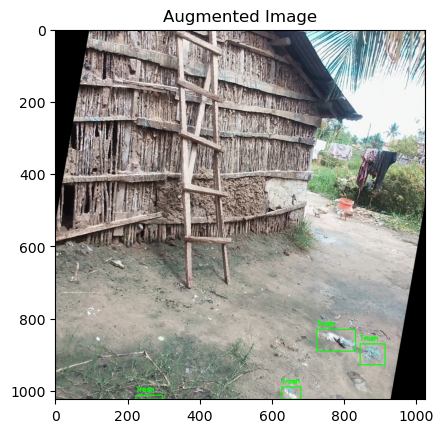

In [106]:
# N.B. for loop below copied from Gemini because I was getting frustrated

for bbox, label in zip(augmented_bboxes, augmented_labels):
    x_min, y_min, x_max, y_max = [int(val) for val in bbox]
    cv2.rectangle(augmented_image, (x_min, y_min), (x_max, y_max), color=(0, 255, 0), thickness=2)
    cv2.putText(augmented_image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

plt.imshow(augmented_image)
plt.title("Augmented Image")